## Reading annotations from file.

In [82]:
import pandas as pd
df = pd.read_excel (r'../corpus/mint-annotations.xlsx')
df.rename(columns={
    'Introduza o número da notícia que vai avaliar (3 dígitos) ': 'news id',
    '1. Indique, numa escala de 1 a 5, quão credível é a notícia que acabou de ler [1 = nada credível e 5 = completamente credível]': 'Credibility',
    '2. Indique, numa escala de 1 a 5, em que medida o título reflete o conteúdo da notícia [1 = nada representativo e 5 = completamente representativo]': 'Accurate headline',
    '3. Indique, numa escala de 1 a 5, quão "clickbait" é o título da notícia [1 = nada clickbait e 5 = completamente clickbait]': 'Clickbait techniques',
    '4. Indique, numa escala de 1 a 5, quão irónico/sarcástico é o título da notícia [1 = nada irónico/sarcástico e 5 = completamente irónico/sarcástico]': 'Irony in headline',
    '5. Indique, numa escala de 1 a 5, o grau de sentimento/emoção veiculado no título da notícia [1 = nenhum sentimento/emoção e 5 = muito sentimento/emoção]': 'Sentiment in headline',
    '6. A notícia cita fontes de informação?': 'Sources of information',
    '6.1. Indique, numa escala de 1 a 5, o grau de credibilidade das fontes citadas na notícia [1 = nada credíveis e 5 = completamente credíveis]':'Sources credibility',
    '7. Indique, numa escala de 1 a 5, o grau de correção linguística da notícia [1 = nada correto e 5 = extremamente correto]':'Linguistic accuracy',
    '8. O autor da notícia emite algum tipo de opinião?':'Subjectivity',
    '9. Indique, numa escala de 1 a 5, o grau de sentimento/emoção veiculado na notícia [1 = nenhum sentimento/emoção e 5 = muito sentimento/emoção]':'Sentiment intensity',
    '10. A notícia recorre a ironia ou sarcasmo?':'Overall irony',
    '11. Indique, numa escala de 1 a 5, quão sensacionalista é a notícia [1 = nada sensacionalista e 5 = completamente sensacionalista]':'Sensationalism',
    '12. A notícia apresenta, direta ou indiretamente, algum tipo de ataque contra indivíduos ou organizações?':'Personal attack',
    '13. A notícia recorre ao medo como estratégia de persuasão do leitor?':'Appeal to fear',
    '14. Após ter respondido a estas questões, a sua perceção sobre a credibilidade da notícia mudou?':'Perception',
    '15. Quais dos seguintes aspetos poderão influenciar de forma mais negativa a credibilidade das notícias (selecione, no máximo, 3 opções)?':'Influencing aspects',
},
    inplace=True)

df.drop(['Filename','Perception'], axis=1, inplace=True)
df[:5]

,news id,Category,Credibility,Accurate headline,Clickbait techniques,Irony in headline,Sentiment in headline,Sources of information,Sources credibility,Linguistic accuracy,Subjectivity,Sentiment intensity,Overall irony,Sensationalism,Personal attack,Appeal to fear,Influencing aspects
0,1,opinion,5,4,3,3,3,Não,NaN,4,Sim,4,Sim,3,Sim,Não,"apelo ao medo, representatividade do título, s..."
1,1,opinion,1,Não sei,Não sei,Não sei,Não sei,Não,NaN,Não sei,Não,Não sei,Não,Não sei,Não,Não,"ausência de fontes, correção linguística, menç..."
2,1,opinion,1,2,Não sei,5,5,Não,NaN,3,Sim,5,Sim,5,Sim,Sim,"apelo ao medo, ausência de fontes, manifestaçã..."
3,1,opinion,1,2,2,5,4,Sim,3,3,Sim,3,Sim,3,Sim,Não,"apelo ao medo, ataque contra indivíduos ou org..."
4,1,opinion,2,1,4,5,4,Não,NaN,Não sei,Sim,3,Sim,2,Sim,Não,"apelo ao medo, ausência de fontes, sensacional..."


## Comparing answers to likert-scale questions.

In [120]:
import numpy as np

likert_columns = ["Credibility", "Accurate headline", "Clickbait techniques", "Irony in headline", 
                       "Sentiment in headline", "Sources credibility", "Linguistic accuracy", "Sentiment intensity", 
                       "Sensationalism"]

df_likert = df.filter(["Category"]+likert_columns , axis=1)

df_likert.replace(r'Não sei', np.NaN, regex=True, inplace=True)
df_likert[likert_columns] = df_likert[likert_columns].apply(pd.to_numeric)

mean_df = df_likert.groupby('Category').mean()
mean_df

,Credibility,Accurate headline,Clickbait techniques,Irony in headline,Sentiment in headline,Sources credibility,Linguistic accuracy,Sentiment intensity,Sensationalism
Category,,,,,,,,,
conspiracy,1.932836,2.576642,3.864000,3.253731,3.445255,3.098039,2.573529,3.715328,4.229630
entertainment,3.062500,3.326667,3.765957,2.424658,3.439189,3.437500,3.238411,3.464052,3.700000
fact,3.568627,3.445161,3.067568,2.118421,3.025806,3.798077,3.721854,2.805195,2.870130
opinion,2.644295,2.979730,3.289855,3.395973,3.574324,3.500000,3.228188,3.800000,3.483221
satire,1.362416,2.852349,3.554745,4.067114,2.767123,2.217391,2.473333,3.140940,4.108844


## Plotting results

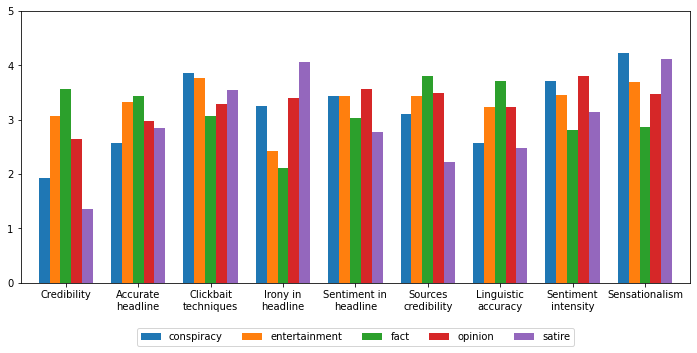

In [141]:
from matplotlib import pyplot as plt

index = ["Credibility", "Accurate\nheadline", "Clickbait\ntechniques", "Irony in\nheadline", 
                       "Sentiment in\nheadline", "Sources\ncredibility", "Linguistic\naccuracy", "Sentiment\nintensity", 
                       "Sensationalism"]

transposed_mean=mean_df.T 
fig, ax = plt.subplots()
transposed_mean.plot(kind="bar", width=0.75, figsize=(12,5), ax=ax)
plt.legend(loc='lower center', bbox_to_anchor=(0., -0.25, 1, 0.), ncol=5)
plt.xticks(rotation=0, ha='right', horizontalalignment='center')
plt.ylim((0, 5.0))
ax.set_xticklabels(index)
plt.show()